<a href="https://colab.research.google.com/github/dani-jimlar/XAI_AIPI_590/blob/main/XAI_Assignment_6_explainable_techniques_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install numpy==1.25.2 pandas==2.0.3 scikit-learn==1.2.2 shap==0.45.1
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython
#!pip install --upgrade scikit-learn


  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-r4p3sf56/alepython_886844e751874cbeb9cd598251cec412
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-r4p3sf56/alepython_886844e751874cbeb9cd598251cec412
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.8 MB/s eta 0:00:00
  Created wheel for alepython: filename=alepython-0.1.dev17+g286350a

#AIPI 590 - XAI | Assignment 6
## Explainable Techniques II
## Daniela Jiménez Lara


## Exploratory analysis

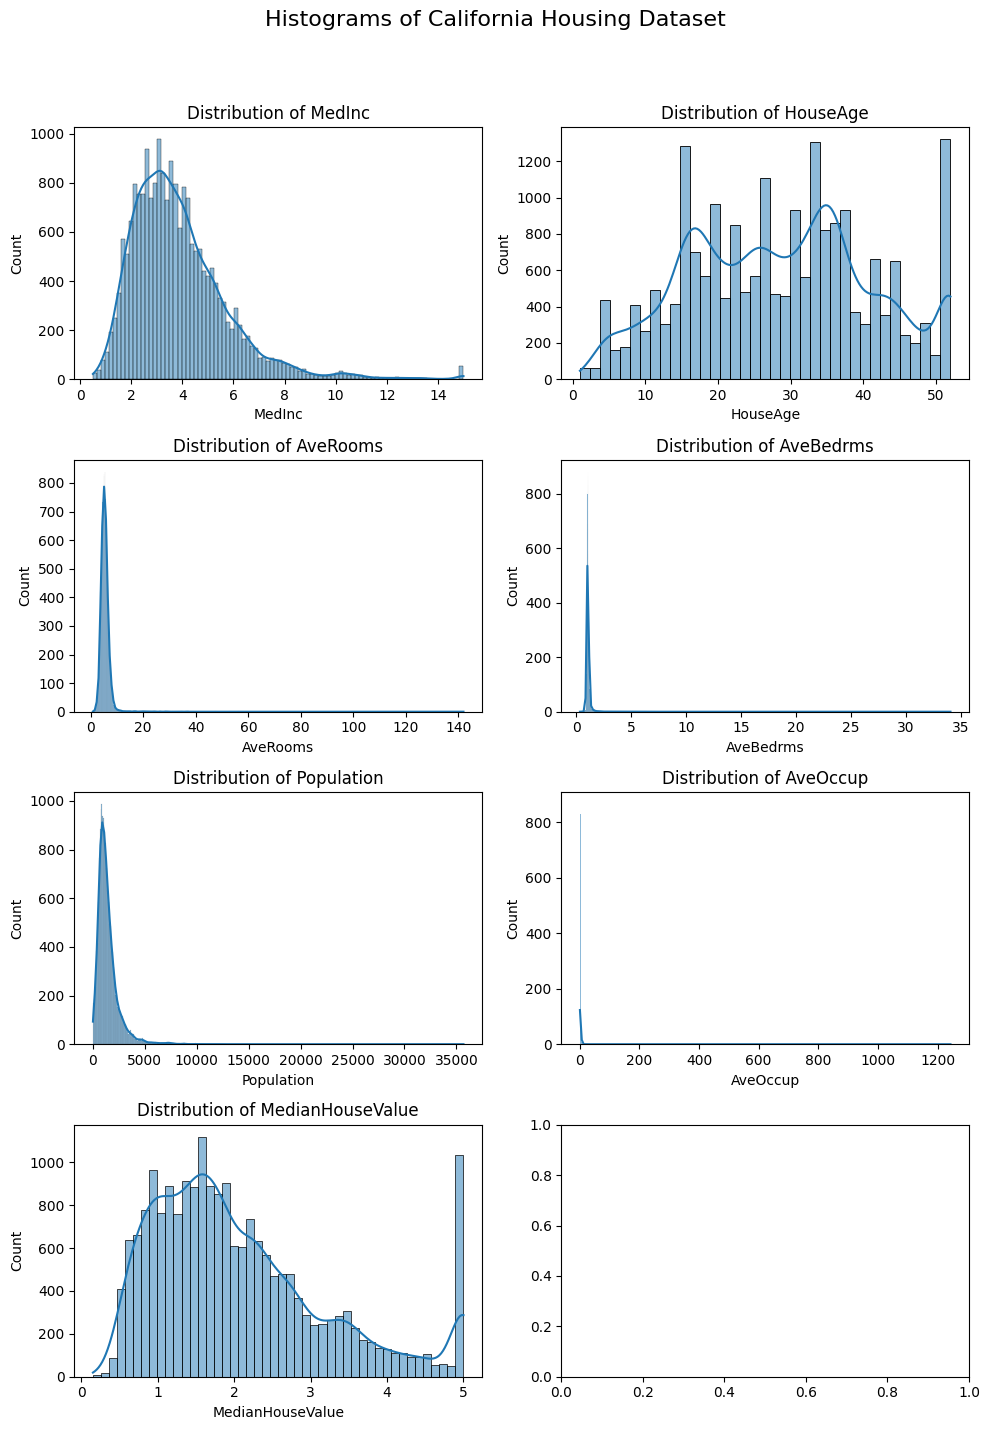

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Add the target variable to the dataframe

X_hist = X.drop(['Latitude', 'Longitude'], axis=1).copy()
X_hist['MedianHouseValue'] = y

# Create histograms for each variable
fig, axes = plt.subplots(4, 2, figsize=(10, 15))
fig.suptitle('Histograms of California Housing Dataset', fontsize=16)

for i, column in enumerate(X_hist.columns):
    row = i // 2
    col = i % 2
    sns.histplot(data=X_hist, x=column, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])



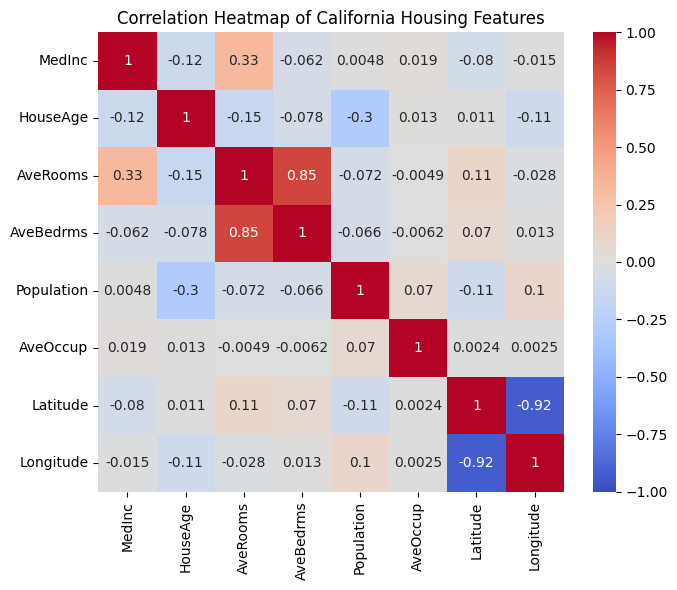

In [6]:
#  correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of California Housing Features')
plt.tight_layout()



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Partial Dependence Plots (PDP)


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
from alepython import ale_plot

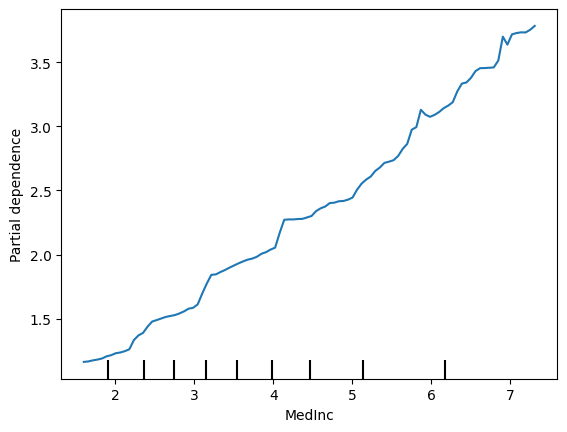

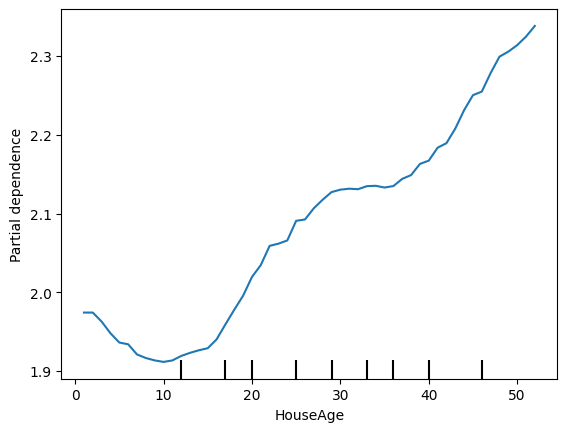

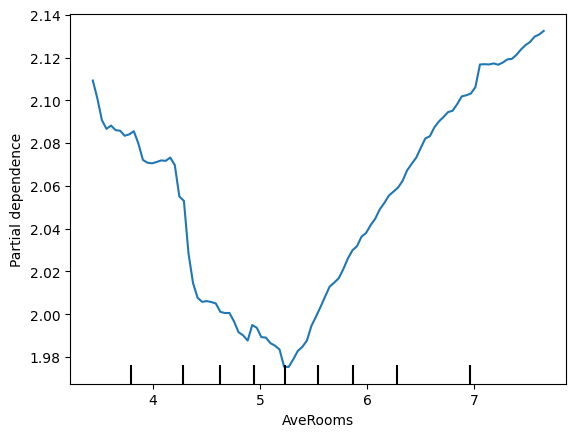

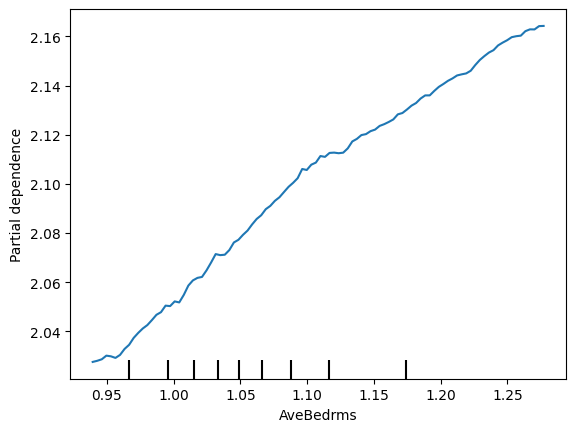

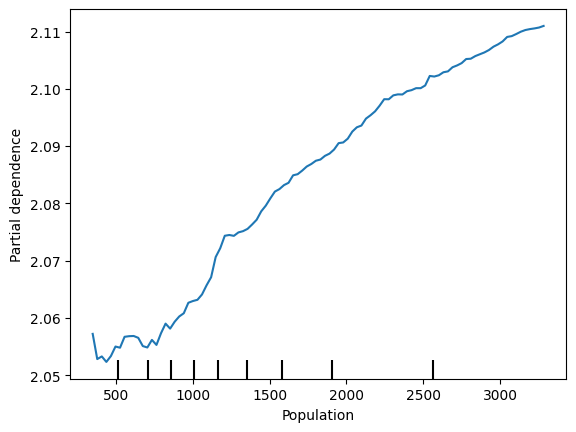

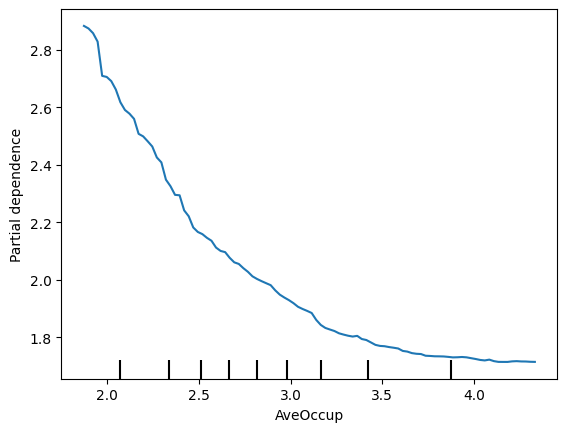

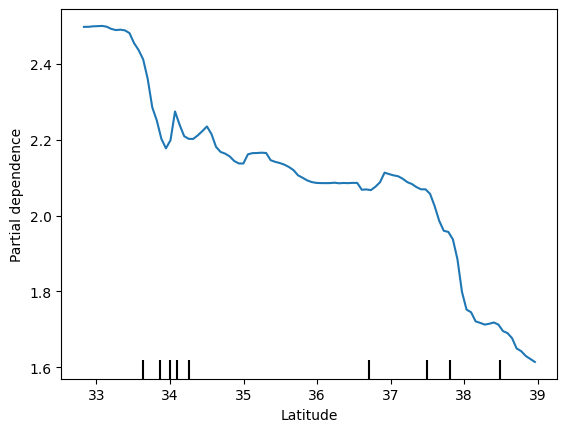

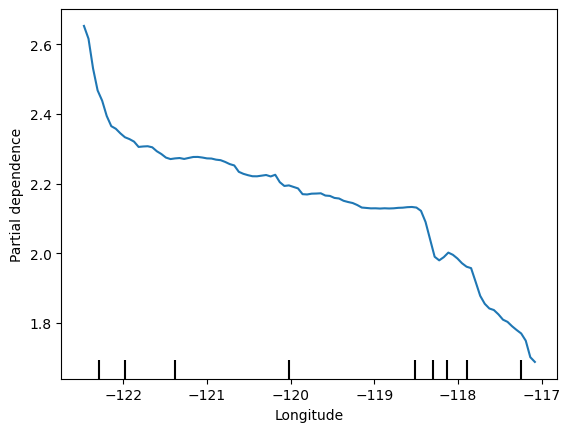

In [11]:
# Create PDP and ICE plots for each feature
for feature in X_train.columns:
  PartialDependenceDisplay.from_estimator(
        model, X_train, [feature]
    )


### Interpretation of partial dependance plot

*   Median Income: shows a positve linar relationship with a steep curve, showing monotonic relationship. If the median income is high, it makes sense that the house values are high as people have more money to buy/invest in their homes.
*   House Age: shows a partial linear relationship but the initial valley of the curve does not allow us to asigb a monotonic relationship
*   Average Rooms: non linear relationship, the huge valley of the curve shows a non linear relationship with the target variable
*.  Average Bedrooms: shows a linear relationship with target variable
*.  Population: positive but not completly linear with several peaks throughout
*.  Average Occupancy: negative non-linear relationship with flatenning behavior as it decreases
*.  Latitude: negative non linear relationship with turning points as you move south, which makes sense as houses near the coast are more expensive
*.  Longitude:negative non linear relationship with turning points as you move west, which makes sense as houses near the coast are more expensive


### Correlation impact
* PDP asumes independece of features so for highly correlated features the assumption from the plot are not completly accurate. In this regard, average rooms and averge bedrooms, and, latitude and longitude, are highly correlated features where the partial dependence plot is not giving accurate information.



## Individual Conditional Expectation (ICE) Plots

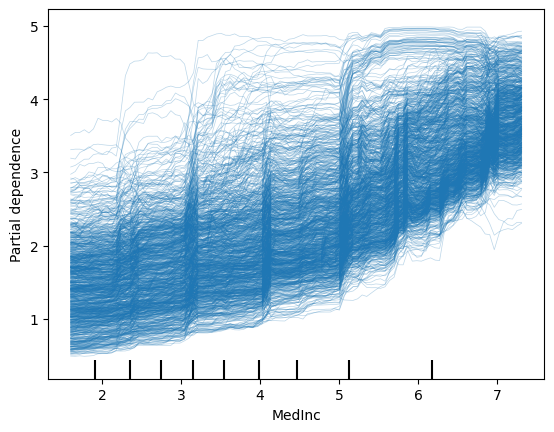

In [13]:


PartialDependenceDisplay.from_estimator(
        model, X_train, ['MedInc'],  kind='individual'
  )


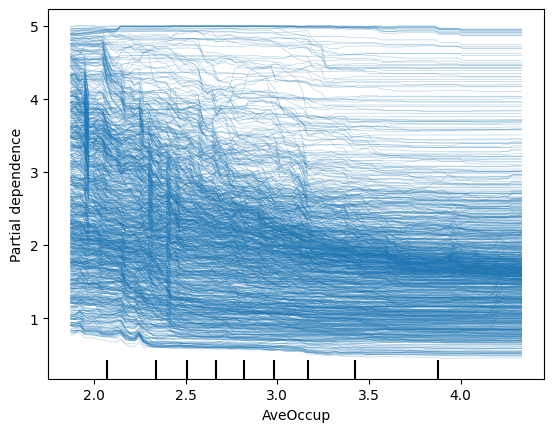

In [14]:
PartialDependenceDisplay.from_estimator(
        model, X_train, ['AveOccup'],  kind='individual'
  )

### Interpretation

The ICE plot shows the effect of the feature variable of each data point on the prediction, where all data points are shown in the graph. This makes each point salient, whereas the PDP showed the averaged effect.


*   Median Income: shows a linear realationship for most of the points
*   Average Occupancy: shows nonlinear negative relationship for most of the points, with some flat movement for a significant portion of the points.



## Accumulated Local Effects Plots (ALE)

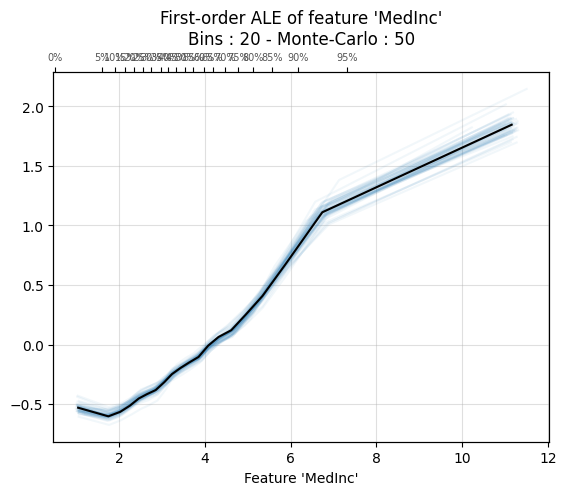

<Axes: title={'center': "First-order ALE of feature 'MedInc'\nBins : 20 - Monte-Carlo : 50"}, xlabel="Feature 'MedInc'">

In [15]:
ale_plot(model, X_train, features=['MedInc'], bins=25, monte_carlo=True)


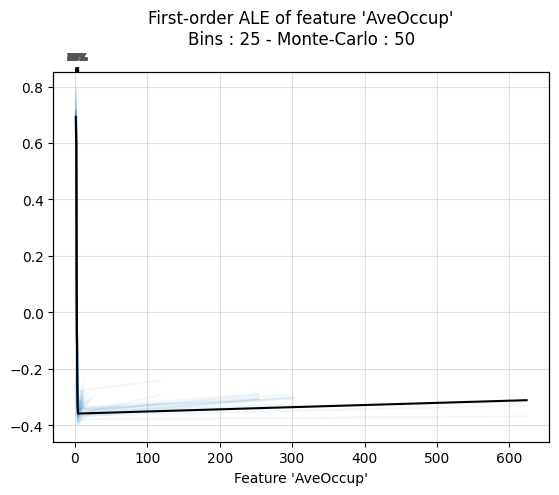

<Axes: title={'center': "First-order ALE of feature 'AveOccup'\nBins : 25 - Monte-Carlo : 50"}, xlabel="Feature 'AveOccup'">

In [17]:
ale_plot(model, X_train, features=['AveOccup'], bins=25, monte_carlo=True)


### Interpretation
The positive steep curve of Median Income on the ALE plot lets us determine the postive linear effect of median income on the house value. The number of bins lets us partition the data to calculate the accumulated effects, the averaged effects are sumed sequentially to show how the feature influences the prediction as its value changes.

The flat line on the Average Occupancy ALE plot shows the minimal and almost null effect of this feature on the house value.